# Arbres binaires avec des tuples

## Représentation avec un seul tuple

Considérons l'arbre binaire suivant:

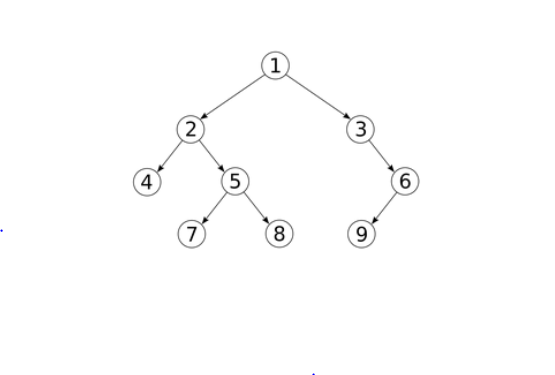


On représenta l'arbre avec un tuple :

arbre = ('1', '2', '3', '4', '5', None, '6', None, None, '7', '8', None, None, '9', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None)

Chaque noeud se repère par son indice $n$ dans la liste,
* son fils gauche se trouvant alors à l’indice : $2n+ 1$ 
* son fils droit à l’indice : $2n+ 2$.

&#x2784; est à l’indice 4 son fils gauche se trouve alors à l’indice 9 et son fils droit à l’indice 10.

### À faire 1:

***Écrire une fonction qui retourne vrai si l'arbre est vide***

In [64]:
'''Jupyter fait par Louis-Alexandre Laguet et Alexis Tourrenc--Lecerf ING 1 GIA'''

def isEmpty(Arbre):
    if (len(Arbre) == 0):
        return True
    return False


***Compléter la fonction qui renvoie les enfants d’un noeud.***

In [65]:
#ici n est l'indice du noeud parent

def printSons(Arbre, n):
    if (2*n+1 < len(Arbre)):
        print("Le fils gauche de ce noeud vaut %d. \n", Arbre[2*n+1])
    if (2*n+2 < len(Arbre)):
        print("Le fils droit de ce noeud vaut %d. \n", Arbre[2*n+2])


***Écrire deux fonctions qui renvoient le fils gauche d’un noeud et son homologue le fils droit s’ils existent.***


In [66]:
#ici n est l'indice du noeud parent

def getLeftSon(Arbre, n): 
    if (2*n+1 < len(Arbre)):
        return Arbre[2*n+1]
    return -1


def getRightSon(Arbre, n): 
    if (2*n+2 < len(Arbre)):
        return Arbre[2*n+2]
    return -1

***Écrire une fonction qui retourne vrai si le noeud est la racine de l’arbre.***

In [67]:
#ici n est l'indice du noeud dont on se demande s'il est racine

def isRoot(Arbre, n): 
    if(n==0):
        return True
    return False


***Écrire une fonction qui retourne vrai si le noeud est une feuille.***

In [68]:
def isLeaf(Arbre, n): 
    if( getLeftSon(Arbre,n)==-1 and getRightSon(Arbre,n)==-1 ):
        return 1
    return 0


## Représentation avec un tuple de tuples


* Chaque noeud est un tuple (valeur, fg , fd )

* fg et fd sont eux-mêmes des tuples éventuellement vide s'il néxiste pas

Ci-dessous voici la représentation de notre arbre :

In [69]:
sept=("7",(),())
huit=("8",(),())
neuf=("9",(),())
six=("6",neuf,())
cinq=("5",sept,huit)
quatre=("4",(),())
trois=("3",(),six)
deux=("2",quatre,cinq)
arbre=("1",deux,trois)
print(arbre)

('1', ('2', ('4', (), ()), ('5', ('7', (), ()), ('8', (), ()))), ('3', (), ('6', ('9', (), ()), ())))


Dans cette situation on accède directement aux noeuds, ce qui permet d'écrire la fonction suivante:

In [70]:
def est_feuille(noeud):
    return noeud[1] == () and noeud[2] == ()

print(est_feuille(trois))
print(est_feuille(sept))

False
True


## La hauteur de l'arbre:

### À faire 2:

l'algorithme récursif du calcul de la hauteur de l'arbre est :

<ul>
    <li> Si l'arbre et vide</li>
    <ul><li> renvoyer -1</li></ul>
    <li> Sinon</li>
    <ul>
        <li> h1 = 1 + hauteur(fils_gauche)</li>
        <li> h2 = 1 + hauteur(fils_droit)</li>
        <li> renvoyer max(h1,h2)</li></ul>
    </ul>

***Écrire la fonction hauteur***

In [71]:
def max(a,b):
    if (a<b):
        return b
    return a


def hauteur(noeud):
    if (isEmpty(noeud)):
        return -1
    if (isLeaf(noeud,0)):
        return 0
    return 1 + max( hauteur(noeud[1]) , hauteur(noeud[2]) )


Ci-dessous un programme qui permet d'afficher l'arbre:

<i> nécessite d'avoir réussi la fonction hauteur </i>

In [72]:
import networkx as nx
import matplotlib.pyplot as plt

def repr_graph(arbre, size=(8,8), null_node=False):
    """
    size : tuple de 2 entiers. Si size est int -> (size, size)
    null_node : si True, trace les liaisons vers les sous-arbres vides
    """
    def parkour(arbre, noeuds, branches, labels, positions, profondeur, pos_courante, pos_parent, null_node):
        if arbre !=():
            noeuds[0].append(pos_courante)
            positions[pos_courante] = (pos_courante, profondeur)
            profondeur -= 1
            labels[pos_courante] = str(arbre[0])
            branches[0].append((pos_courante, pos_parent))
            pos_gauche = pos_courante - 2**profondeur
            parkour(arbre[1], noeuds, branches, labels, positions, profondeur, pos_gauche, pos_courante, null_node)
            pos_droit = pos_courante + 2**profondeur
            parkour(arbre[2], noeuds, branches, labels, positions, profondeur, pos_droit, pos_courante, null_node)
        elif null_node:
            noeuds[1].append(pos_courante)
            positions[pos_courante] = (pos_courante, profondeur)
            branches[1].append((pos_courante, pos_parent))
    
    
    if arbre ==():
        return
    
    branches = [[]]
    profondeur = hauteur(arbre)
    pos_courante = 2**profondeur
    noeuds = [[pos_courante]]
    positions = {pos_courante: (pos_courante, profondeur)} 
    labels = {pos_courante: str(arbre[0])}
    
    if null_node:
        branches.append([])
        noeuds.append([])
        
    profondeur -= 1
    parkour(arbre[1], noeuds, branches, labels, positions, profondeur, pos_courante - 2**profondeur, pos_courante, null_node)
    parkour(arbre[2], noeuds, branches, labels, positions, profondeur, pos_courante + 2**profondeur, pos_courante, null_node) 

    mon_arbre = nx.Graph()
    
    if type(size) == int:
        size = (size, size)    
    plt.figure(figsize=size)
    
    nx.draw_networkx_nodes(mon_arbre, positions, nodelist=noeuds[0], node_color="white", node_size=550, edgecolors="blue")
    nx.draw_networkx_edges(mon_arbre, positions, edgelist=branches[0], edge_color="black", width=2)
    nx.draw_networkx_labels(mon_arbre, positions, labels)

    if null_node:
        nx.draw_networkx_nodes(mon_arbre, positions, nodelist=noeuds[1], node_color="white", node_size=50, edgecolors="grey")
        nx.draw_networkx_edges(mon_arbre, positions, edgelist=branches[1], edge_color="grey", width=1)

    ax = plt.gca()
    ax.margins(0.1)
    plt.axis("off")
    plt.show()
    plt.close()

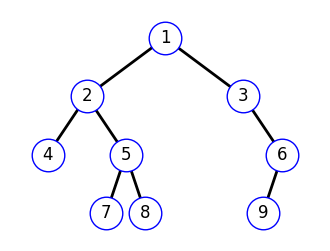

In [73]:
repr_graph(arbre,(4,3),False)

## Les parcours

### À faire 3:

En vous inspirant de ce qui a été vu en cours, écrire les fonctions qui réalisent les parcours en largeur et en profondeur (prefixe, infixe et postfixe) d'un arbre avec cette représentation.

In [74]:
def traiter(e):
    print(e[0])


# Parcours Largeur
def parcoursLargeur(arbre):
    l=[]
    l2=[]
    l.append(arbre)
    while len(l)>0:
        for i in l:
            if i==():
                continue
            print(i[0])
            l2+=i[1:]
        l=l2
        l2=[]


In [75]:
# Parcours Prefixe

def parcoursPrefixe(Arbre):
    if not(isEmpty(Arbre)) :
        traiter(Arbre[0])
        parcoursPrefixe(Arbre[1])
        parcoursPrefixe(Arbre[2])

In [76]:
# Parcours Infixe

def parcoursInfixe(Arbre):
    if not(isEmpty(Arbre)) :
        parcoursPrefixe(Arbre[1])
        traiter(Arbre[0])
        parcoursPrefixe(Arbre[2])
        

In [77]:
# Parcours Postfixe

def parcoursPostfixe(Arbre):
    if not(isEmpty(Arbre)) :
        parcoursPrefixe(Arbre[1])
        parcoursPrefixe(Arbre[2])
        traiter(Arbre[0])
        

## Compléments

### À faire 4:

Écrire des fonctions qui :

* renvoie la taille de l'arbre
* renvoie la somme des valeurs des noeuds
* renvoie le noeud de plus garnde valeur

In [86]:
def taille(Arbre):
    if isEmpty(Arbre) or isLeaf(Arbre, 0):
        return 0
    return 1 + taille(Arbre[1]) + taille (Arbre[2])

9

In [90]:
def somme(Arbre):
    if isEmpty(Arbre):
        return 0
    elif isLeaf(Arbre, 0):
        return Arbre[0]
    return int(Arbre[0]) + somme(Arbre[1]) + somme(Arbre[2])
somme(arbre)

45

In [93]:
def maxVal(Arbre):
    if isEmpty(Arbre):
        return 0
    return max(int(Arbre[0]), max(maxVal(Arbre[1]), maxVal(Arbre[2])))
maxVal(arbre)

9